In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
# Cargamos los datos
df = pd.read_csv("taxi.csv")
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


## Estudio de los datos

### Vamos a comprobar si hay valores nulos o valores atípicos

In [3]:
# Comprobamos si hay valores nulos
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

Text(0, 0.5, 'Distance traveled')

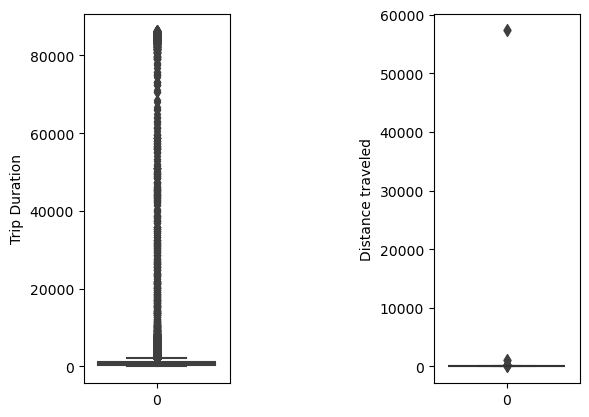

In [4]:
plt.subplot(1,3,1)
sns.boxplot(df["trip_duration"])
plt.ylabel("Trip Duration")

plt.subplot(1,3,3)
sns.boxenplot(df["distance_traveled"])
plt.ylabel("Distance traveled")


En el boxplot superior derecho podemos observar como hay valores atípicos en la columna 'distance_traveled'

Text(0, 0.5, 'Fare')

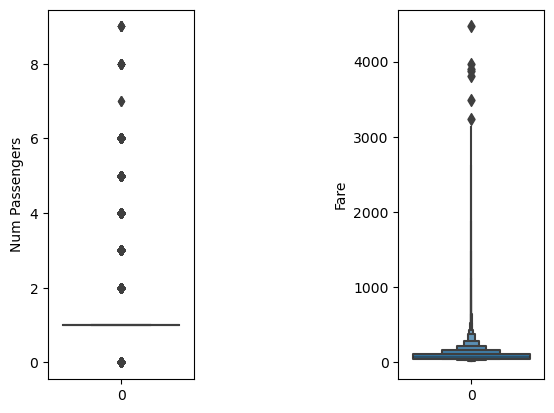

In [5]:
plt.subplot(1,3,1)
sns.boxplot(df["num_of_passengers"])
plt.ylabel("Num Passengers")

plt.subplot(1,3,3)
sns.boxenplot(df["fare"])
plt.ylabel("Fare")

Text(0, 0.5, 'Miscellaneous Fees')

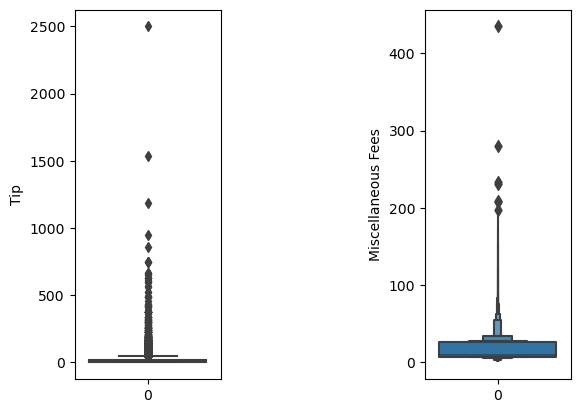

In [6]:
plt.subplot(1,3,1)
sns.boxplot(df["tip"])
plt.ylabel("Tip")

plt.subplot(1,3,3)
sns.boxenplot(df["miscellaneous_fees"])
plt.ylabel("Miscellaneous Fees")

In [7]:
df["num_of_passengers"].value_counts()

1.0    179229
2.0     17896
5.0      4713
6.0      3382
3.0      2757
4.0       908
0.0       753
8.0        25
9.0         8
7.0         2
Name: num_of_passengers, dtype: int64

In [8]:
df["distance_traveled"].sort_values(ascending=False).head()

197339    57283.91
83097      1136.50
34734       315.25
78367       215.31
132372      188.29
Name: distance_traveled, dtype: float64

In [9]:
df["trip_duration"].sort_values(ascending=False).head()

53527     86387.0
75836     86384.0
146430    86363.0
92970     86345.0
206451    86326.0
Name: trip_duration, dtype: float64

In [10]:
df[df.index == 197339]


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
197339,1734.0,57283.91,1.0,187.125,20,50.875,258.0,0


In [11]:
df[df.index == 83097]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
83097,486.0,1136.5,1.0,61.95,0,2.25,64.2,0


In [12]:
# En la columna "distance_traveled" tenemos dos valores muy superiores que no se corresponde con el tiempo que ha tardado en la columna
# de "trip_duration" a no ser que viajase en un cohete jaja. Por lo tanto procedo a eliminar ese registro.
_ = df["distance_traveled"].sort_values(ascending=False).head(2).index
df = df.drop(_, axis=0)

In [13]:
# Reordenamos el orden de las columnas para mostrar correctamente un grafico de correlacion
df = df.reindex(columns=["trip_duration", "distance_traveled", "num_of_passengers", "fare", "tip", "miscellaneous_fees","surge_applied", "total_fare"])

<Axes: >

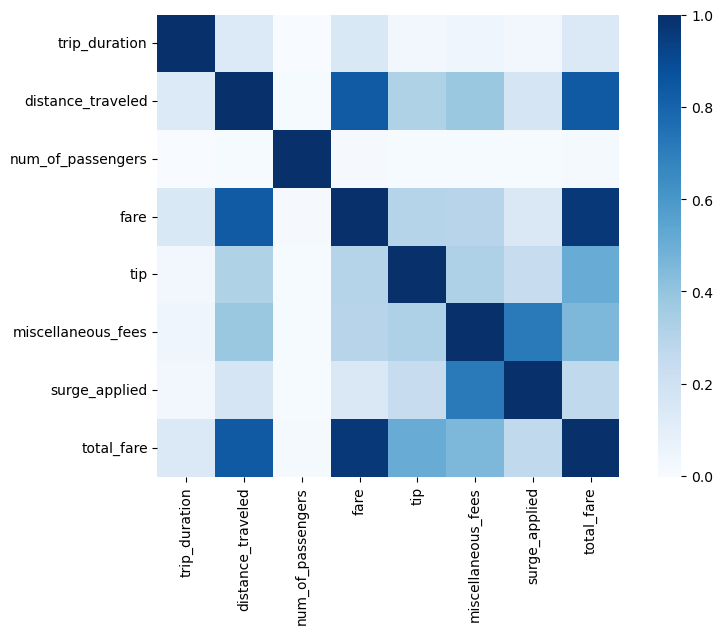

In [14]:
corr = df.corr()

plt.subplots(figsize=(10,6))
sns.heatmap(corr, cmap="Blues", square=True)

## Seleccion de datos

In [15]:
x = df[["fare", "distance_traveled", "tip", "miscellaneous_fees"]]
y = df["total_fare"]

Tras probar con diferentes variables, las que he seleccionado son las que mejor precisión me han dado a la hora de predecir futuros resultados.
Por ejemplo si quito la variable 'miscellaneous_fees', la precisión baja hasta un 97% que está muy bien pero si la añado consigo un 100% de precisión.

## Division del conjunto de datos

In [16]:
# #Conjunto de entrenamiento, conjunto de validacion
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.05, random_state=1)

# Conjunto de entrenamiento, conjunto de testeo
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.05, random_state=1)

In [17]:
x_train.shape

(189227, 4)

In [18]:
y_train.shape

(189227,)

In [19]:
x_val.shape

(10484, 4)

## Creacion del modelo de regresion lineal

In [20]:
# Vamos a utliziar para este ejrrcicio el modelo de regresión lineal.
# Creamos el modelo y lo entrenamos con las variables de entrenamiento
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Prediccion del conjunto de validacion

In [21]:
# Prediccion de las variables de validación.
y_pred = lr.predict(x_val)

In [22]:
# Metricas
print("Error cuadratico: ", round(np.sqrt(mean_squared_error(y_val, y_pred)),5))
print("Coeficiente de determinacion: ", round(r2_score(y_val, y_pred),2))

Error cuadratico:  0.0
Coeficiente de determinacion:  1.0


Como podemos observar ya obtenemos un coeficiente de dereminación igual a 1, esto quiere decir que nuestro modelo de regresión tiene una precisión del 100% y a la hora de realizar futuras predicciones nos dará el resultado exacto y por ende nuestro error cuadrático es de 0, es decir, no hay diferencia entre la variable real y la que queremos predecir.

### Prediccion de datos futuros

In [23]:
# Vamos a predecir los valores utilizando la variable x_test.
y_pred = lr.predict(x_test)

In [24]:
# Metricas
print("Error cuadratico: ", round(np.sqrt(mean_squared_error(y_test, y_pred)),5))
print("Coeficiente de determinacion: ", round(r2_score(y_test, y_pred),2))

Error cuadratico:  0.0
Coeficiente de determinacion:  1.0


## Conclusion

El mejor resutltado obtenido ha sido de un 100% de coeficiente de determinacion y el error cuadrático es de 0.

Para obtener ese resultado hemos tenido que utilizar las columnas que aparecen en nuestra variable X.
Por lo tanto si queremos predecir futuros resultados solo con esas 4 variables sabemos que si la limpieza de datos se realiza de manera correcta, los resultados predichos no tendrán varianza, osea el valor real será igual al valor predicho.